## Recursión
Es posible hacer otro tipo de bucles, la idea es hacer funciones que se llamen a sí mismas. Por ejemplo:

In [2]:
function fact(N::Int)
   if N==0
      return 1
   else
      return big(N)*fact(N-1)
   end
end

fact (generic function with 1 method)

In [3]:
fact(10)

3628800

Otro ejemplo de este tipo de funciones es:

In [4]:
function fibonacci(N::Int)
    if N == 1 
        big(0)
    elseif N == 2 || N == 3
        big(1)
    else
    fibonacci(N-1) + fibonacci(N-2)
    end
end

fibonacci (generic function with 1 method)

In [5]:
fibonacci(8)

13

In [ ]:
fibonacci(2_0) 

Notemos que escribí '2_0', solamente es una manera de separar dígitos y sea más sencillo leerlos (para números grandes), se puede hacer la separación como se quiera (cómo lo hice yo). Aunque recomiendo la manera estándar para evitar confusiones. Por ejemplo

In [19]:
1_000_000 == 1000000

true

#Ejercicio 1
Realice utilizando recursión la función de Ackermann:

$$A(m,n)={\begin{cases}n+1&{\mbox{si }}m=0\\A(m-1,1)&{\mbox{si }}m>0{\mbox{ y }}n=0\\A(m-1,A(m,n-1))&{\mbox{si }}m>0{\mbox{ y }}n>0.\end{cases}}$$

Para A(4,2) es un entero con 19 729 dígitos.

# Funciones Anónimas

Ya hemos visto dos maneras de hacer funciones, pero además, podemos crearlas de manera anónima, es decir, sin asignarles un nombre. Para hacerlo se puede utilizar cualquiera de las sintaxis:



In [20]:
x -> 2x^2 -1

(anonymous function)

In [21]:
function (x)
    2x^2  - 1
end

(anonymous function)

Estas funciones toman un argumento y regresan $2x^2 -1$ evaluado en el argumento dado. Además, las funciones anonimas aceptar múltiples argumentos utilizando la sintaxis (x,y,z)->2x+y-z. 

### ¿Cuál es la utilidad para estas funciones anónimas?

Es pasarlas a funciones que toman otras funciones como argumentos. El ejemplo clásico es la función 'map()', la cual aplica la función dada a cada valor de un arreglo regresa un nuevo arreglo con los valores resultantes.

In [22]:
map(sin, collect(0:1:6))

7-element Array{Float64,1}:
  0.0     
  0.841471
  0.909297
  0.14112 
 -0.756802
 -0.958924
 -0.279415

Lo cual es perfecto si ya tenemos una función existente con nombre que haga esto y solamente la agregamos como argumento de la función 'map()'. Sin embargo, muy frecuentemente no tenemos funciones previamente hechas, entonces podemos usar estos objetos y usarlos al momento.

In [23]:
map(x -> 2x^2 - 1, collect(-2:0.5:2))

9-element Array{Float64,1}:
  7.0
  3.5
  1.0
 -0.5
 -1.0
 -0.5
  1.0
  3.5
  7.0

Más adelante utilizaremos las funciones anónimas en algunos ejemplos.

# Trabajando con archivos

Hay veces que podriamos querer guardar o leer archivos de datos, por ejemplo si el programa genera mucha información y después queremos analizarla. Para abrir archivos (o crealos) usamos 'open("nombrearchivo.txt", mode)' (puse '.txt' pero se pueden otros formatos). El 'mode' modo en el que abrimos dependera que queremos realizar con el archivo:

Mode	Description
r	    read
r+	    read, write
w	    write, create, truncate
w+	    read, write, create, truncate
a	    write, create, append
a+	    read, write, create, append

Como no tenemos ningún archivo, queremos crearlo y escribir información en él.

In [2]:
f = open("datos.txt", "w+")

IOStream(<file datos.txt>)

Ahora queremos escribir datos en este archivo, una manera de hacer esto es utilizar la función 'writedlm()' (recordemos que el notebook también puede proporcionar información sobre las funciones utilizando ?funcion)

In [3]:
?writedlm

search: writedlm



```
writedlm(f, A, delim='\\t')
```

Write `A` (a vector, matrix or an iterable collection of iterable rows) as text to `f` (either a filename string or an `IO` stream) using the given delimeter `delim` (which defaults to tab, but can be any printable Julia object, typically a `Char` or `AbstractString`).

For example, two vectors `x` and `y` of the same length can be written as two columns of tab-delimited text to `f` by either `writedlm(f, [x y])` or by `writedlm(f, zip(x, y))`.


In [4]:
writedlm(f, rand(50,2))

In [5]:
close(f)

Ahora hagamos pruebas leyendo archivos

In [6]:
f = open("datos.txt", "r")   # Solamente podemos leer el archivo

IOStream(<file datos.txt>)

In [7]:
writedlm(f, rand(66,2))

LoadError: LoadError: ArgumentError: write failed, IOStream is not writeable
while loading In[7], in expression starting on line 1

In [8]:
xrands = readdlm("datos.txt")[:,1]
yrands = readdlm("datos.txt")[:,2] # Colacamos ; para que no saque el resultado al Out

50-element Array{Float64,1}:
 0.135128 
 0.467273 
 0.734322 
 0.116184 
 0.0178589
 0.453319 
 0.243786 
 0.208655 
 0.931473 
 0.618867 
 0.690383 
 0.671994 
 0.410841 
 ⋮        
 0.148225 
 0.227734 
 0.689153 
 0.887323 
 0.392339 
 0.22453  
 0.457793 
 0.0757514
 0.408891 
 0.718211 
 0.504205 
 0.253007 

Más adelante le daremos utilidad a estos datos. Pero como ya tenemos la información dentro del notbook podemos cerrar el archivo.

In [9]:
close(f)

# PyPlot

Ahora veremos los fundamentos básicoscomo utilizar PyPlot (una herramienta para generar gráficas). Para más información de esta paquetería se puede consultar su github https://github.com/JuliaPy/PyPlot.jl/blob/master/README.md (también ahi tiene las instrucciones para istalar el paquete). Antes que nada le indicamos a Julia que usaremos este paquete con 'using PyPlot'.

In [1]:
using PyPlot

Empecemos utilizando el ejemplo básico que sugiere la documentación

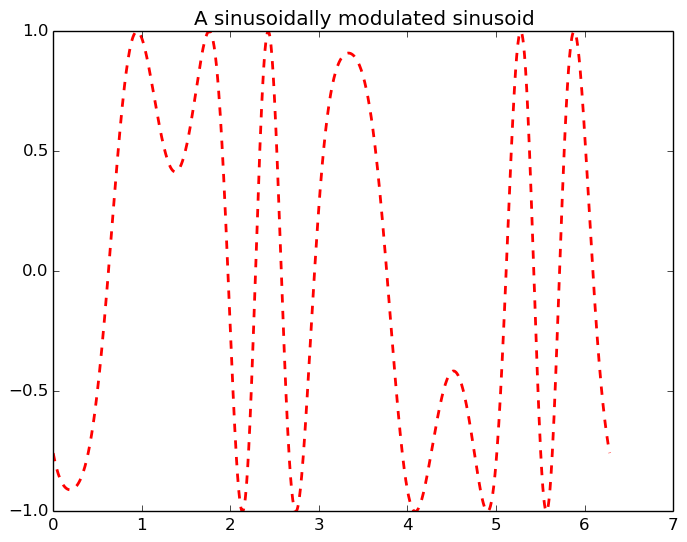

PyObject <matplotlib.text.Text object at 0x7f6d85102690>

In [21]:
x = linspace(0,2*pi,1000); y = sin(3*x + 4*cos(2*x)); #Generamos un rango ir a cada valor del rango le asignamos otro valor
plot(x, y, color="red", linewidth=2.0, linestyle="--") #Indicamos los valores a graficar, color y tipo de linea
title("A sinusoidally modulated sinusoid") #Indicamos el título

Ahora utlicemos las funciones anónimas para generar gráficas. Utilizaremos ecuaciones con formato LaTeX para el título, ejes y etiquetar las curvas.

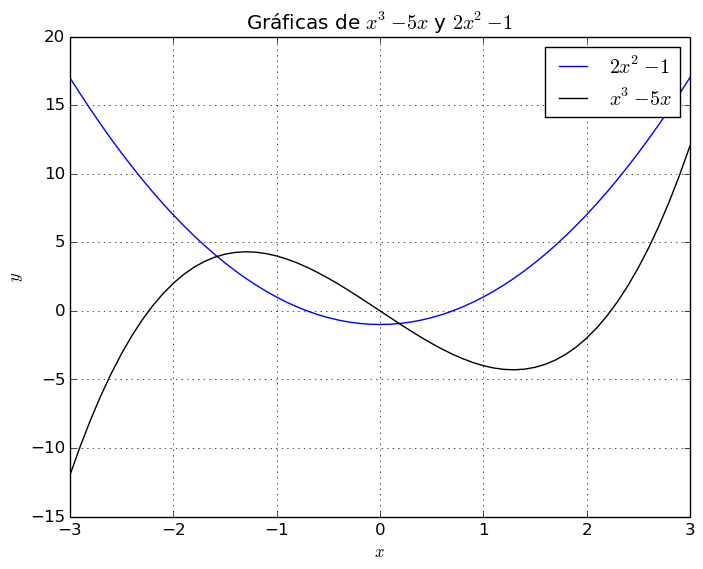

PyObject <matplotlib.text.Text object at 0x7f491803f8d0>

In [2]:
#Generamos arreglos
xs2 = collect(-3:0.1:3); ys2 = map(x -> 2x^2 - 1, xs2)
xs3 = collect(-3:0.1:3); ys3 = map(x -> x^3 - 5x, xs3)
plot(xs2, ys2, color = "blue", label = L"$2x^2-1$")
legend() #etiquetamos con el lanel del plot
plot(xs3, ys3, color = "black", label = L"$x^3-5x$") 
legend()
title(L"Gráficas de $x^3 -5x$ y $2x^2 - 1$") # Utilizamos L"algo" para que ese algo esté en formato LaTeX
grid() #Colocamos la red
ylabel(L"y")
xlabel(L"x")
# también podemos indicar los límites de los ejes

Hagamos las mismas pero con subplot.

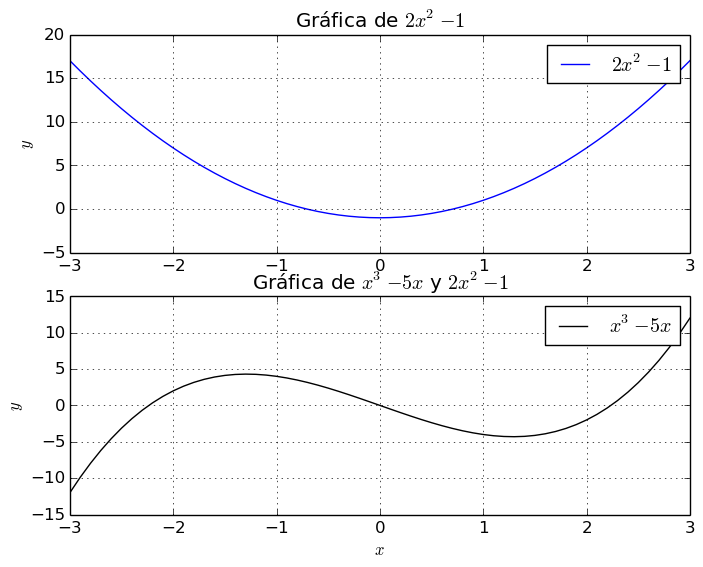

PyObject <matplotlib.text.Text object at 0x7f6d831ee810>

In [57]:
#Generamos arreglos
xs2 = collect(-3:0.1:3); ys2 = map(x -> 2x^2 - 1, xs2)
xs3 = collect(-3:0.1:3); ys3 = map(x -> x^3 - 5x, xs3)
figure() #Generamks una figura vacía
subplot(2,1,1) # Primer subplot
plot(xs2, ys2, color = "blue", label = L"$2x^2-1$")
legend() #etiquetamos con el lanel del plot
title(L"Gráfica de $2x^2 - 1$") #Titulo para este subplot
ylabel(L"y") #Etiqueta faltante
grid()

subplot(2,1,2) #Segundo subplot
plot(xs3, ys3, color = "black", label = L"$x^3-5x$") 
legend()
title(L"Gráfica de $x^3 -5x$ y $2x^2 - 1$") # Utilizamos L"algo" para que ese algo esté en formato LaTeX
grid() #Colocamos la red para cada subplot
ylabel(L"y")
xlabel(L"x")

### ¿Cómo funciona esto?

Hay que pensar a los subplot como matrices. Si queremos 2 subplots uno encima del otro es 2x1, uno al lado del otro 1x2, entonces 'subplot(2,1,...' para 2x1, y 'subplot(1,2,..' para 1x2. Para el tercer argumento es el "elemento de matriz" que llenamos. finalmente, cada subplot lleva con su plot. Así, para generar el primer subplot:

subplot(2, 1, 1)
plot(loquequietas1)
 
Y para el segundo subplot:

subplot (2, 1, 2)
plot (loquequietas2)

#### Mas detalles
Solamente faltan unos pequeños detalles, que pueden resultar muy útiles, cambiar los límites de la gráfica. Reutilizaremos 'xs2' y 'ys2'. Primero utilizaremos 'axis("equal")' para hacer que los ejes tengan la misma proporción.

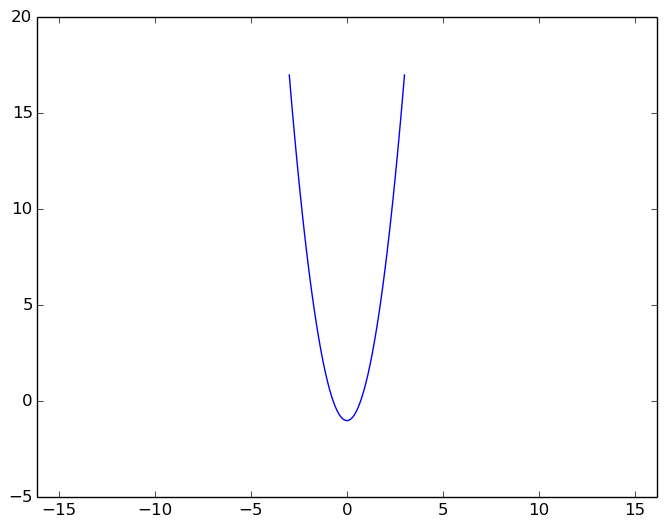

(-3.0,3.0,-5.0,20.0)

In [6]:
plot(xs2, ys2)
axis("equal")

Sin embargo, se pueden ajustar como queramos. Utilizando 'xlim(lim_inf,lim_sup)' para el eje x, y 'ylim(lim_inf, lim_sup)' para el eje y. Ademas podemos comparar la siguiente gráfica reajustando la proporción entre los ejes removiendo '#' en la segunda linea.

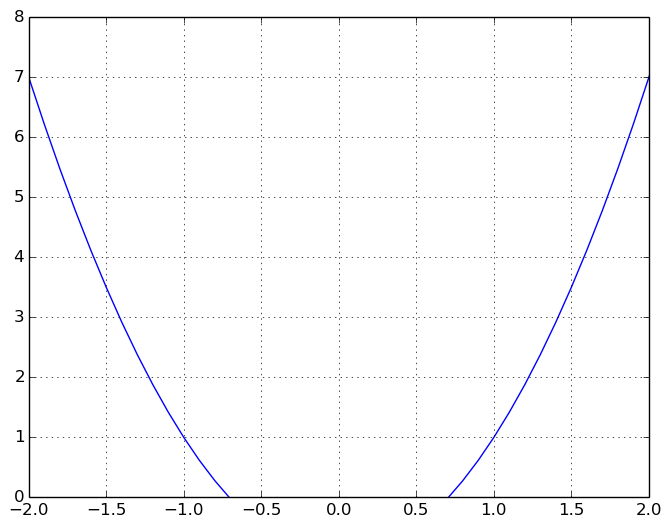

In [12]:
plot(xs2, ys2)
#axis("equal")
xlim(-2, 2) # primer argumento lim inferior, segundo argunento limite superior
ylim(0, 8)
grid()

## Graficar puntos

Para graficar puntos utilizamos la función 'scatter' que pertence a PyPlot, como ejemplo utilizaremos 'xrands' y 'yrands' que generamos en la sección de trabajando con archivos.

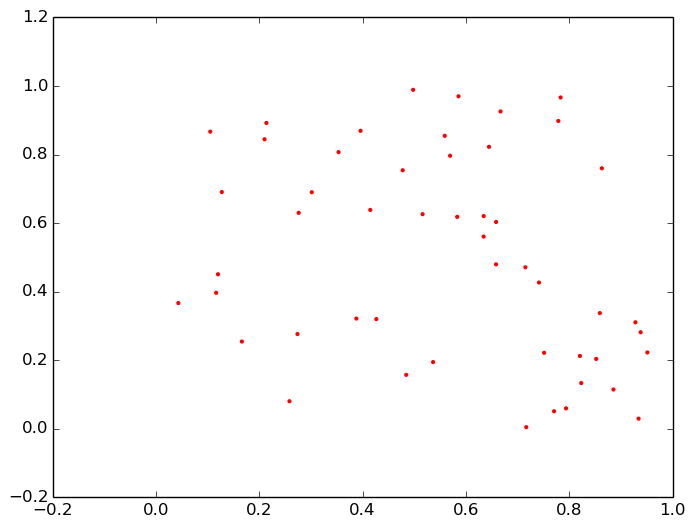

PyObject <matplotlib.collections.PathCollection object at 0x7f491319f590>

In [37]:
scatter(xrands,yrands, color = "red")

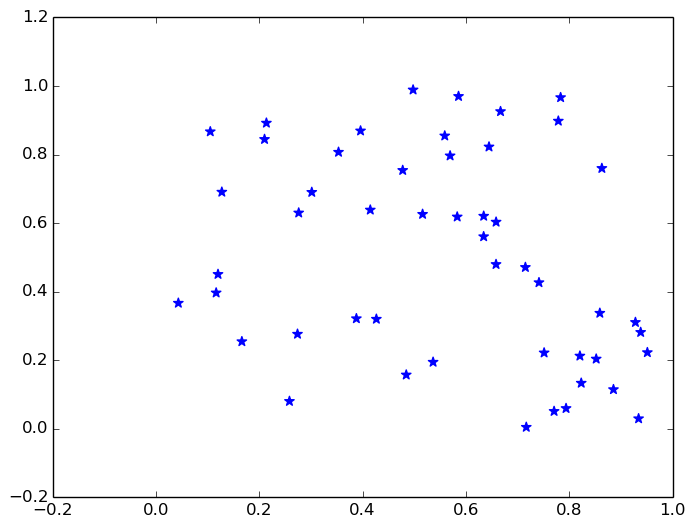

PyObject <matplotlib.collections.PathCollection object at 0x7f4912f468d0>

In [41]:
#el argumento s = 50 modifica el tamaño del marcador
# marker = "*" modifica el tipo de marcador (hay más)
scatter(xrands,yrands, color = "blue", s = 50, marker = "*")

##Histogramas
Por último, histogramas, solamente se vera un ejemplo, se pueden hacer más cosas, pero corresponde a cada quien investigar según los intereses.

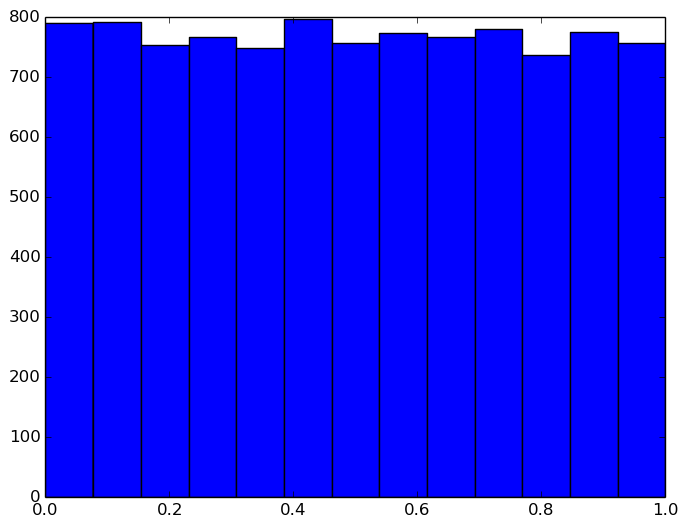

([790.0,793.0,754.0,767.0,749.0,798.0,758.0,774.0,767.0,780.0,738.0,775.0,757.0],[1.8191102384879088e-5,0.07693587550459073,0.15385355990679658,0.23077124430900242,0.3076889287112083,0.38460661311341415,0.46152429751561996,0.5384419819178259,0.6153596663200317,0.6922773507222375,0.7691950351244434,0.8461127195266492,0.923030403928855,0.999948088331061],Any[PyObject <matplotlib.patches.Rectangle object at 0x7f4913b69690>,PyObject <matplotlib.patches.Rectangle object at 0x7f49139882d0>,PyObject <matplotlib.patches.Rectangle object at 0x7f491369ad10>,PyObject <matplotlib.patches.Rectangle object at 0x7f4913874050>,PyObject <matplotlib.patches.Rectangle object at 0x7f4913874890>,PyObject <matplotlib.patches.Rectangle object at 0x7f49138a1b50>,PyObject <matplotlib.patches.Rectangle object at 0x7f491384f510>,PyObject <matplotlib.patches.Rectangle object at 0x7f49138bef10>,PyObject <matplotlib.patches.Rectangle object at 0x7f4913693c10>,PyObject <matplotlib.patches.Rectangle object at 0x7f491

In [50]:
hist_data = rand(10_000)
nbins = 13 # numero de cajas
PyPlot.plt[:hist](hist_data, nbins)

La sintasix de esto puede parecer bastante complicada, sin embargo es para evitar conflictos con la función 'hist' ya existente.

Se pueden hacer muchas más cosas, pero lo visto aquí es lo más básico. Si se quiere profundizar más se puede consultar la documentación, la págiba https://gist.github.com/gizmaa/7214002 también cuenta con varios ejemplos. Se puede poner texto en la gráfica, flechas, modificar la red, entre orras cosas.

# ¿Qué sigue?

En cuanto a graficas hay más paqueterias, una de las cuales se verá en un Notebook aparte para evitar conflictos con PyPlot.  Esta es más práctica y cuenta con muchos detalles interesantes, sin embargo, es un poco más complicada la intalación (por lo nuevo del paquete) lo que no permite utilizarla en algunos equipos.

Además, proximamente habrá noteboos especificos para otras herramientas, paqueterias y tecnicas no básicas.